<a href="https://colab.research.google.com/github/Annie-blare/WSL_LAB/blob/main/Copy_of_TotalCerealsandMinorMillets_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this with the correct path
data = pd.read_csv(file_path)

# Selecting the 'TotalNPK' and 'TotalCerealsandMinorMillets_Production' columns
X = data[['TotalNPK']]
y = data['TotalCerealsandMinorMillets_Production']

# Performing linear regression
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# Extracting 'TotalNPK' for Bengaluru
bengaluru_totalnpk = data.loc[data['District'] == 'BENGALURU', 'TotalNPK'].iloc[0]

# User provided perturbations in percentages
user_perturbations = [10, -10, -20, 20]
# Converting percentages to fractions
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Calculating 'TotalCerealsandMinorMillets_Production(old)' for Bengaluru
cereals_production_old = data.loc[data['District'] == 'BENGALURU', 'TotalCerealsandMinorMillets_Production'].iloc[0]

# Min-max normalization for 'TotalCerealsandMinorMillets_Production(old)'
cereals_production_min = y.min()
cereals_production_max = y.max()
normalized_cereals_production_old = (cereals_production_old - cereals_production_min) / (cereals_production_max - cereals_production_min)

# Applying corrected perturbations and calculating new values
results_corrected = []
for p in perturbations_corrected:
    perturbed_totalnpk = bengaluru_totalnpk * (1 + p)
    cereals_production_new = m * perturbed_totalnpk + c
    normalized_cereals_production_new = (cereals_production_new - cereals_production_min) / (cereals_production_max - cereals_production_min)
    change_in_cereals_production = cereals_production_new - cereals_production_old
    impact = normalized_cereals_production_new - normalized_cereals_production_old

    results_corrected.append({
        'Perturbation': f'P{user_perturbations.index(p*100)+1}',
        'Magnitude (%)': p*100,
        'Cereals_Production(old)': cereals_production_old,
        'Normalized_Cereals_Production(old)': normalized_cereals_production_old,
        'Cereals_Production(new)': cereals_production_new,
        'Normalized_Cereals_Production(new)': normalized_cereals_production_new,
        'Change_in_Cereals_Production': change_in_cereals_production,
        'Impact': impact
    })

results_df_corrected = pd.DataFrame(results_corrected)
print(results_df_corrected)


  Perturbation  Magnitude (%)  Cereals_Production(old)  \
0           P1           10.0                    69153   
1           P2          -10.0                    69153   
2           P3          -20.0                    69153   
3           P4           20.0                    69153   

   Normalized_Cereals_Production(old)  Cereals_Production(new)  \
0                            0.012664            213098.682566   
1                            0.012664            187084.713490   
2                            0.012664            174077.728952   
3                            0.012664            226105.667105   

   Normalized_Cereals_Production(new)  Change_in_Cereals_Production    Impact  
0                            0.147046                 143945.682566  0.134382  
1                            0.122760                 117931.713490  0.110097  
2                            0.110618                 104924.728952  0.097954  
3                            0.159189                 1569

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjusted to the correct file path
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['TotalCerealsandMinorMillets_Production']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [10, -10, -20, 20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'TotalCerealsandMinorMillets_Production'
cereals_production_min = y.min()
cereals_production_max = y.max()

# Loop through each unique district in the dataset
for district in data['District'].unique():
    # Extracting 'TotalNPK' and 'TotalCerealsandMinorMillets_Production' for the current district
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    cereals_production_old = data.loc[data['District'] == district, 'TotalCerealsandMinorMillets_Production'].iloc[0]
    normalized_cereals_production_old = (cereals_production_old - cereals_production_min) / (cereals_production_max - cereals_production_min)

    district_results = []

    # Applying perturbations and calculating new values for each perturbation
    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        cereals_production_new = m * perturbed_totalnpk + c
        normalized_cereals_production_new = (cereals_production_new - cereals_production_min) / (cereals_production_max - cereals_production_min)
        change_in_cereals_production = cereals_production_new - cereals_production_old
        impact = normalized_cereals_production_new - normalized_cereals_production_old

        district_results.append({
            'Perturbation (%)': p * 100,
            'Cereals_Production(old)': cereals_production_old,
            'Normalized_Cereals_Production(old)': normalized_cereals_production_old,
            'Cereals_Production(new)': cereals_production_new,
            'Normalized_Cereals_Production(new)': normalized_cereals_production_new,
            'Change_in_Cereals_Production': change_in_cereals_production,
            'Impact': impact
        })

    # Convert the district results into a DataFrame and print it
    district_df = pd.DataFrame(district_results)
    print(f"Results for {district}:")
    print(district_df)
    print("\n")  # Add a newline for better readability between districts


Results for BENGALURU:
   Perturbation (%)  Cereals_Production(old)  \
0              10.0                    69153   
1             -10.0                    69153   
2             -20.0                    69153   
3              20.0                    69153   

   Normalized_Cereals_Production(old)  Cereals_Production(new)  \
0                            0.012664            213098.682566   
1                            0.012664            187084.713490   
2                            0.012664            174077.728952   
3                            0.012664            226105.667105   

   Normalized_Cereals_Production(new)  Change_in_Cereals_Production    Impact  
0                            0.147046                 143945.682566  0.134382  
1                            0.122760                 117931.713490  0.110097  
2                            0.110618                 104924.728952  0.097954  
3                            0.159189                 156952.667105  0.146525  


Res

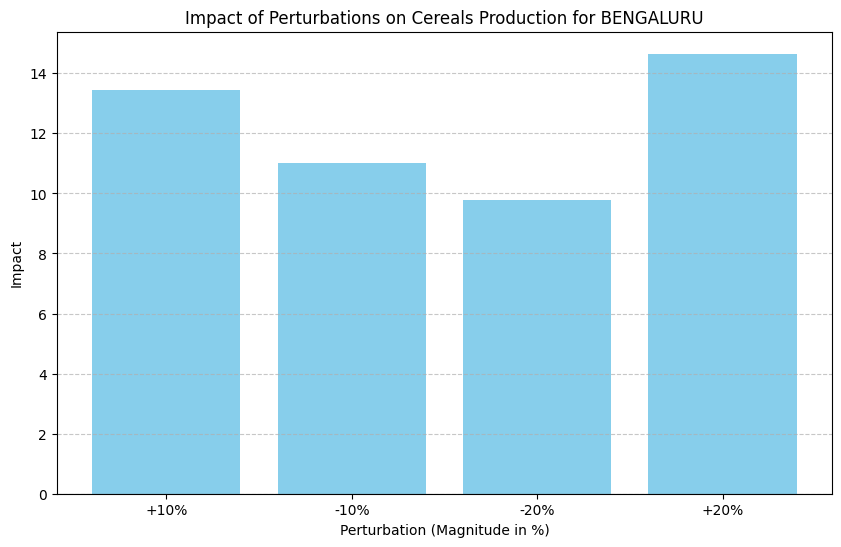

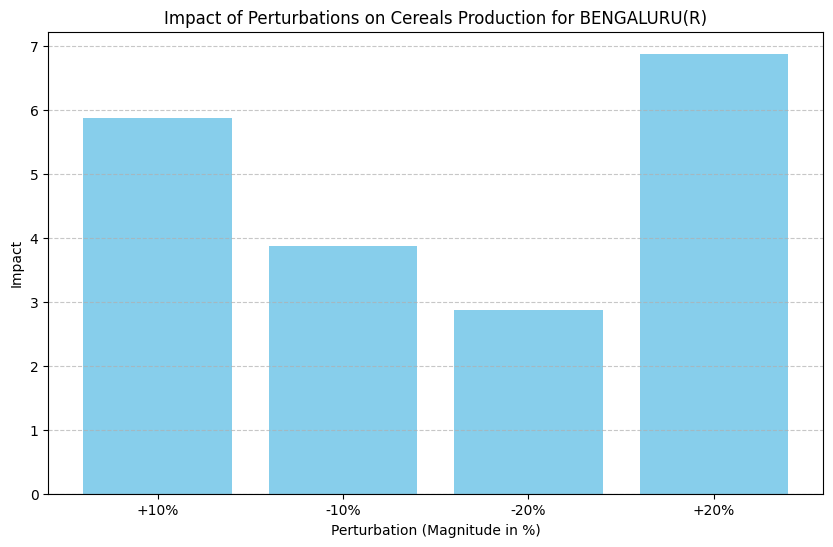

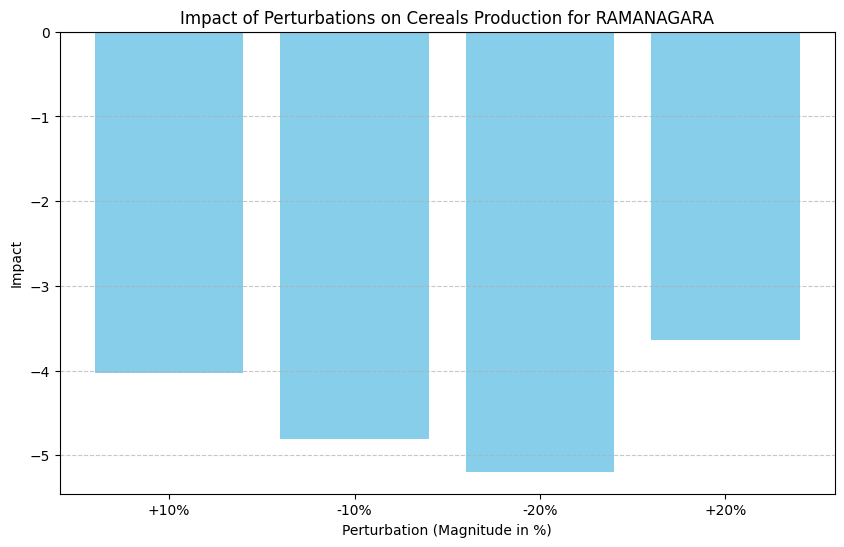

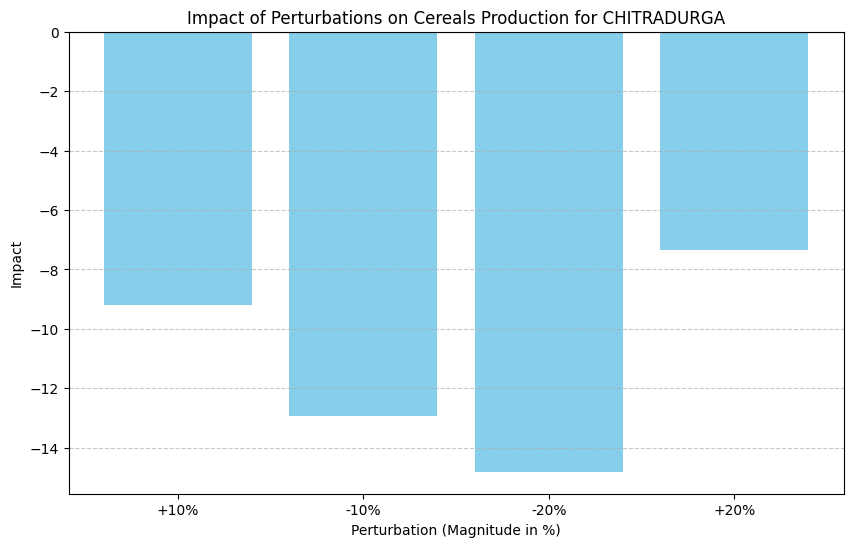

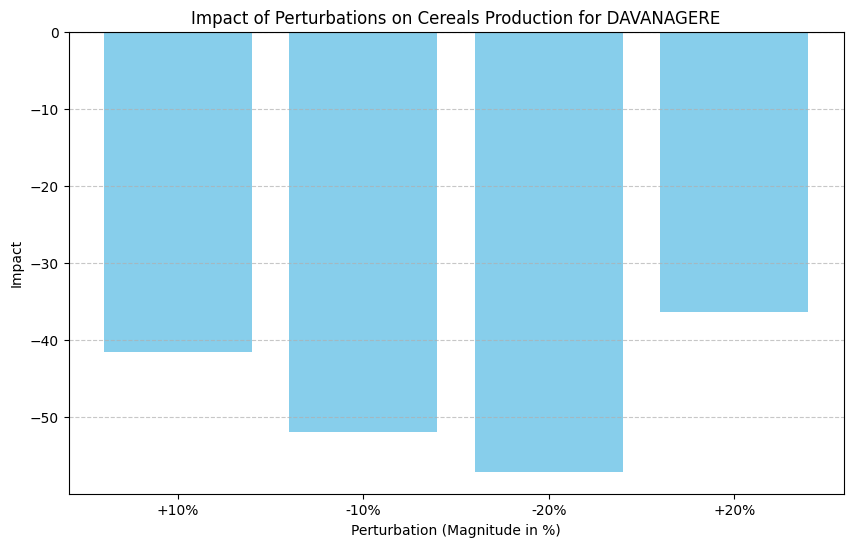

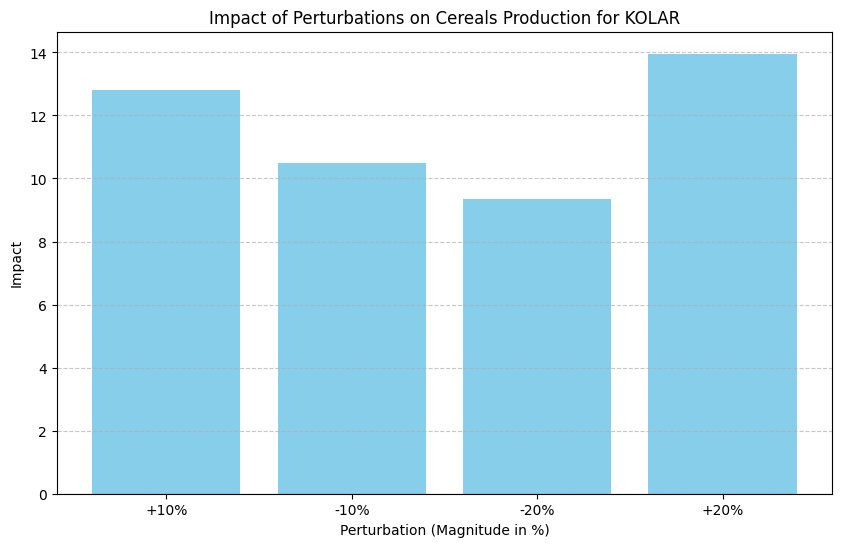

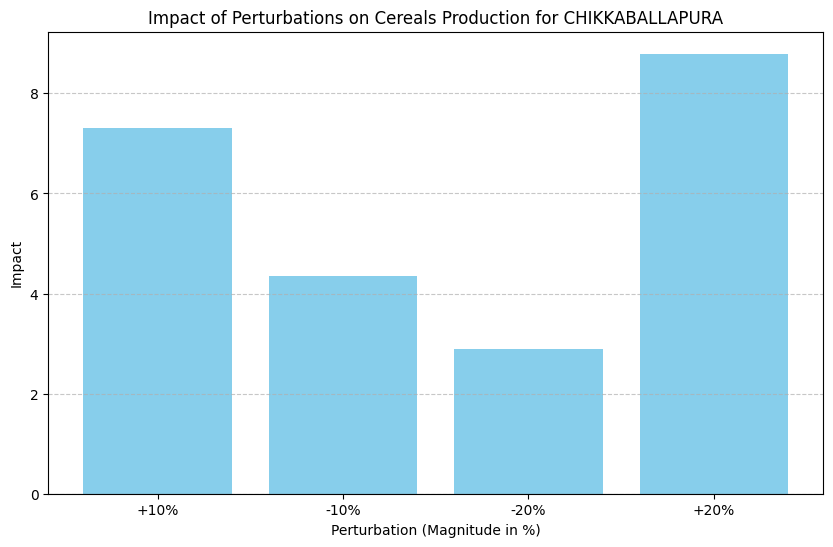

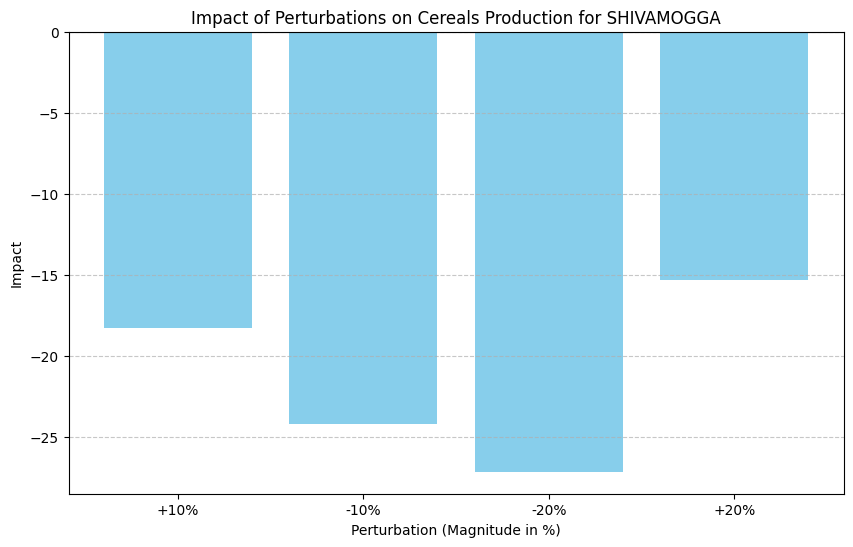

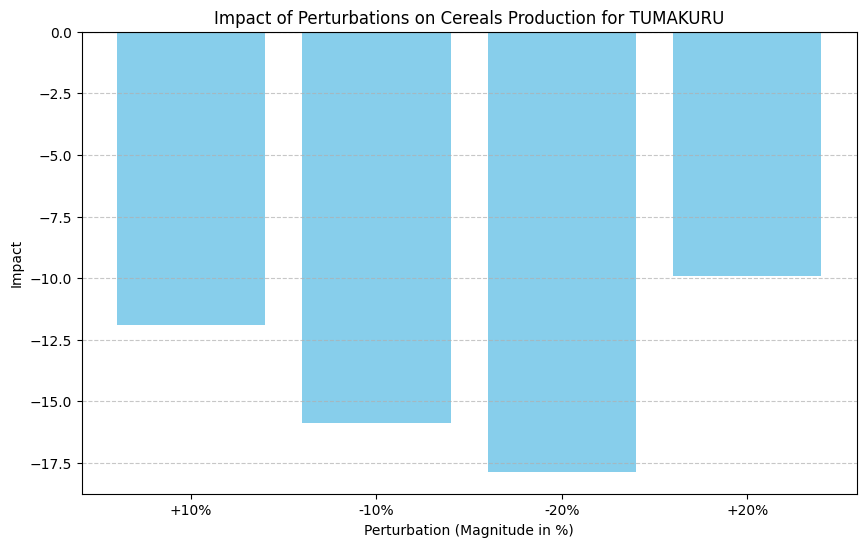

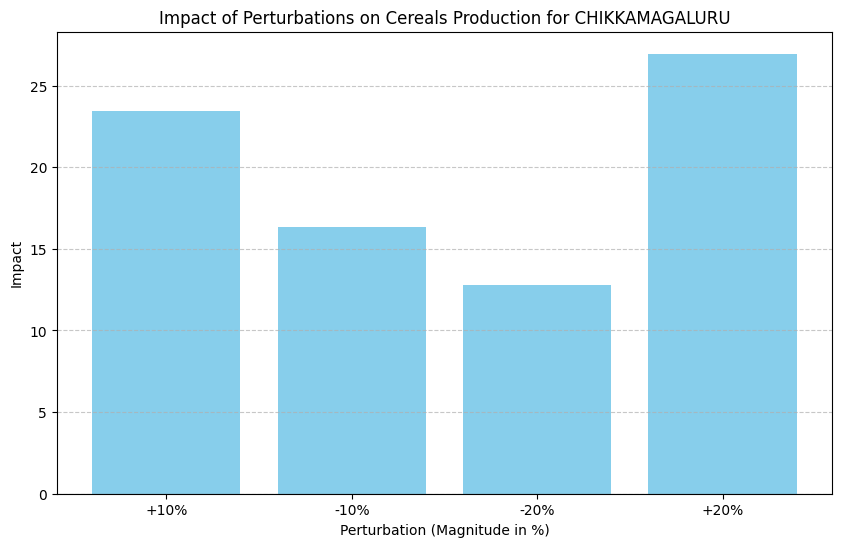

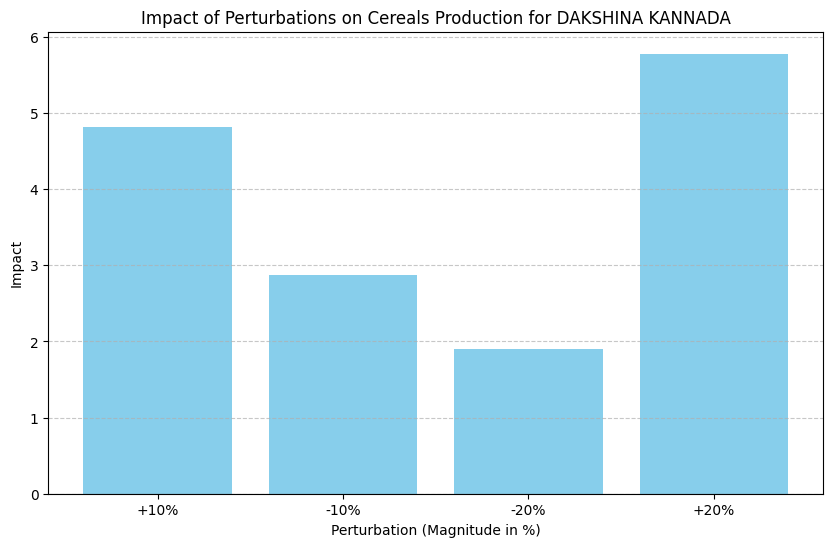

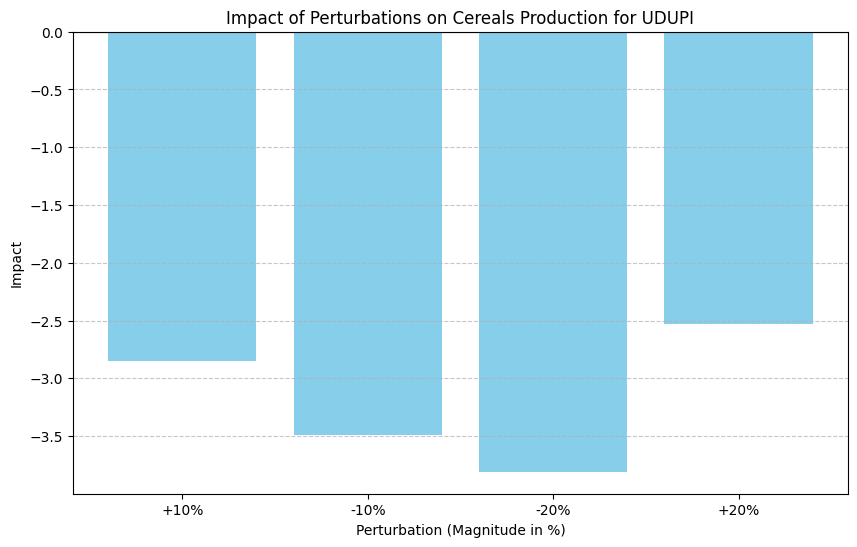

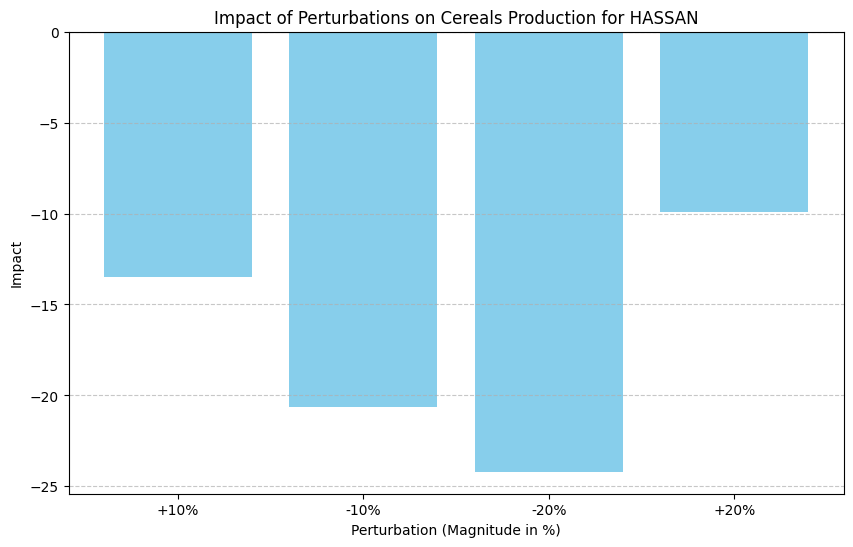

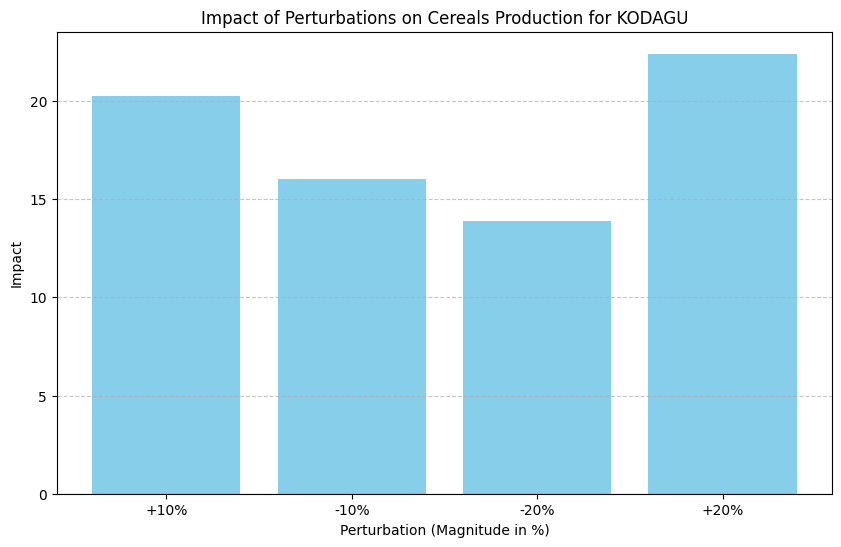

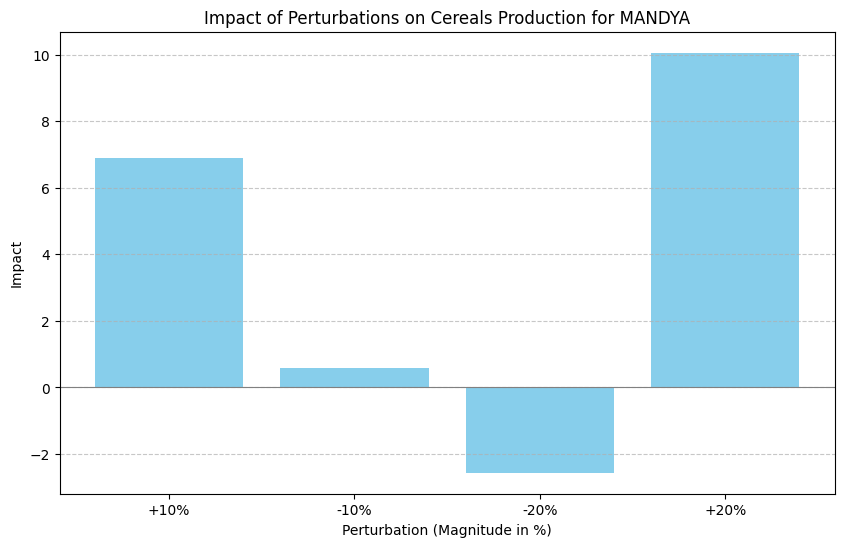

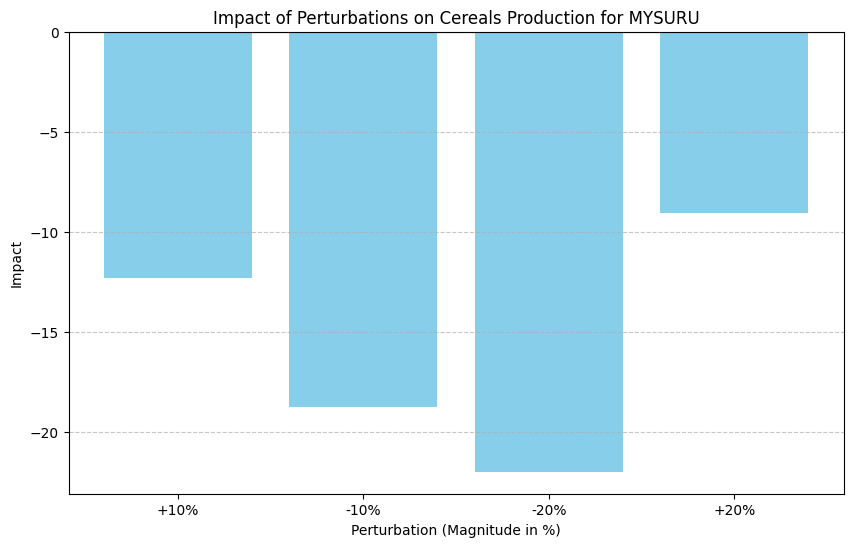

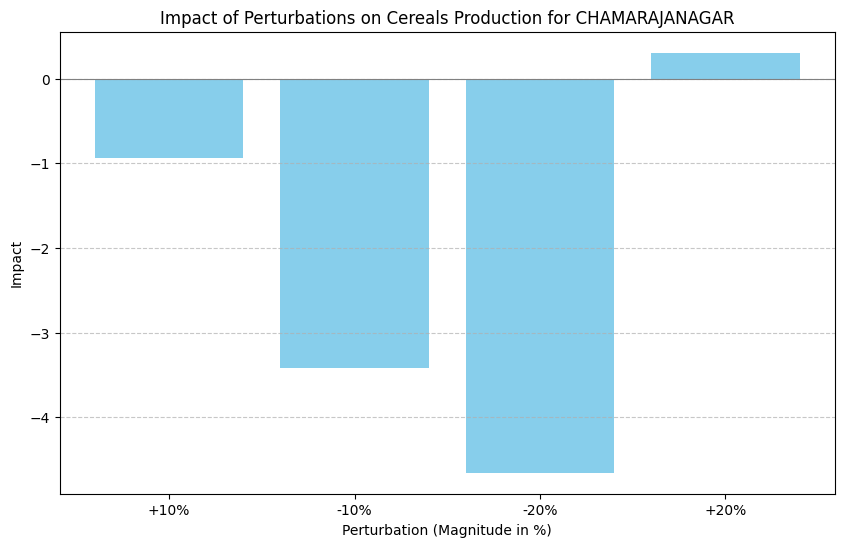

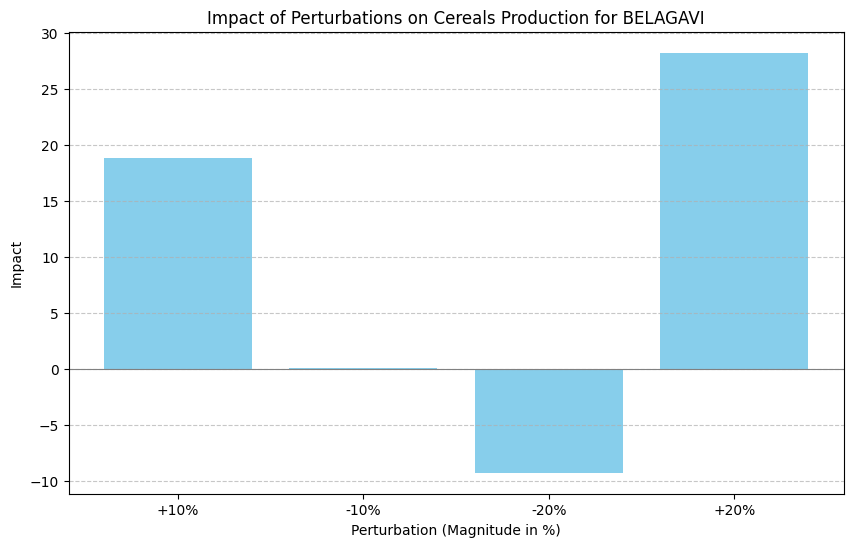

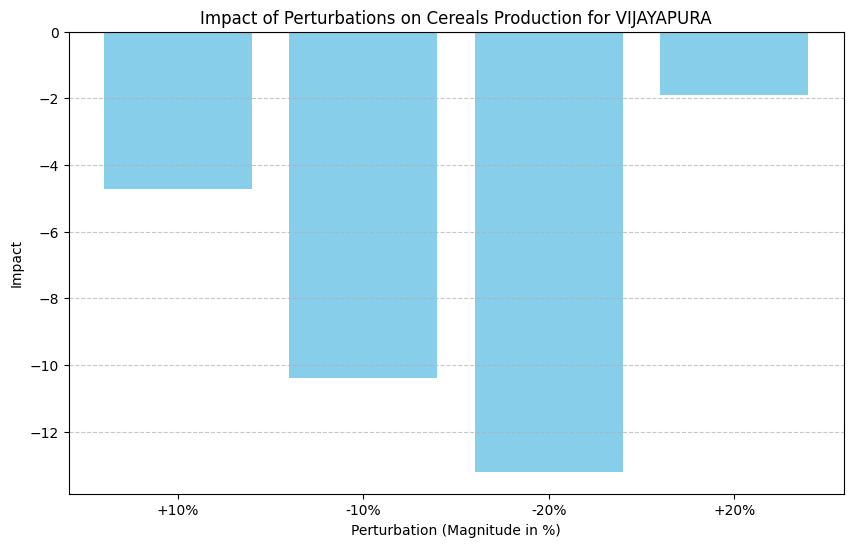

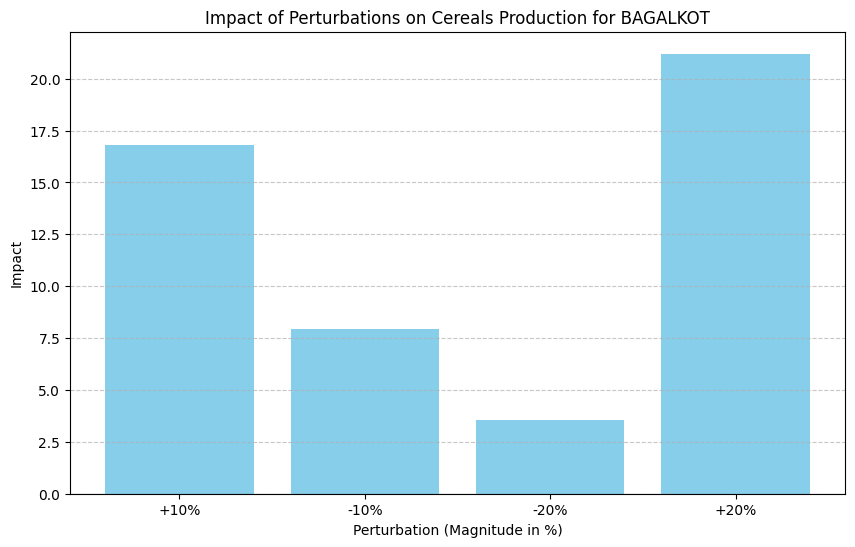

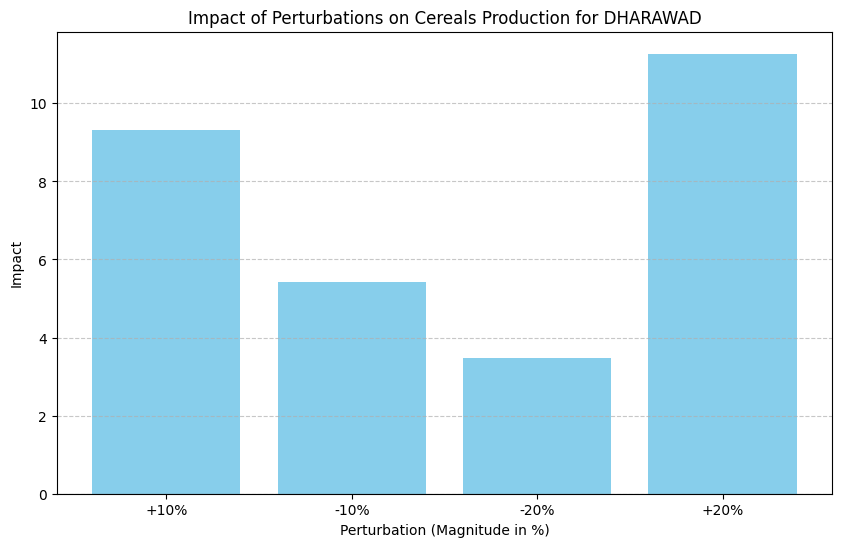

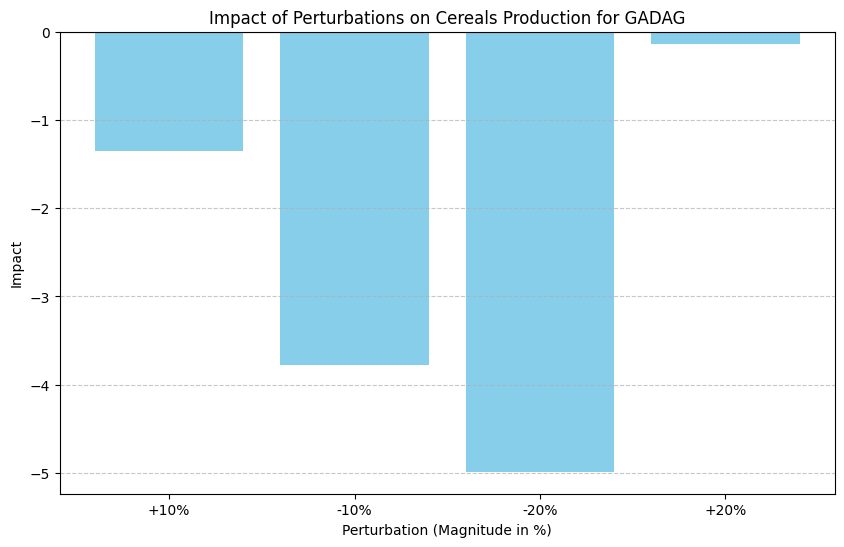

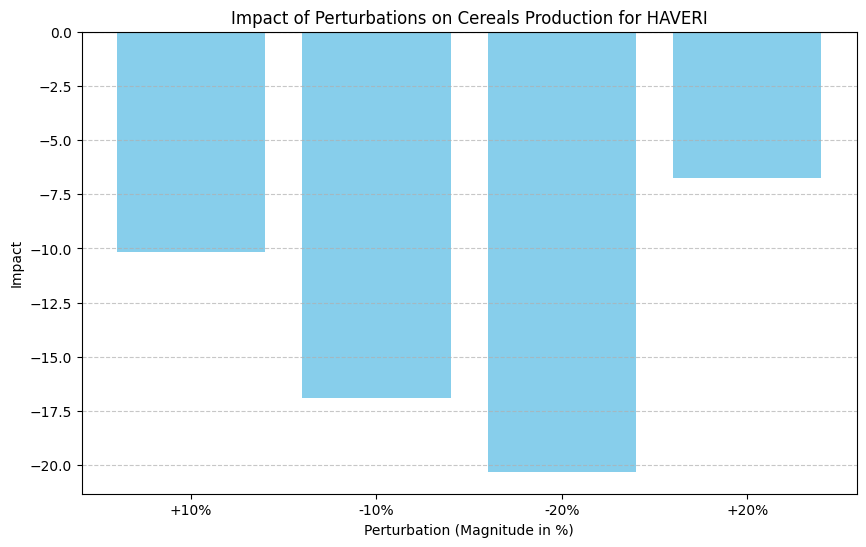

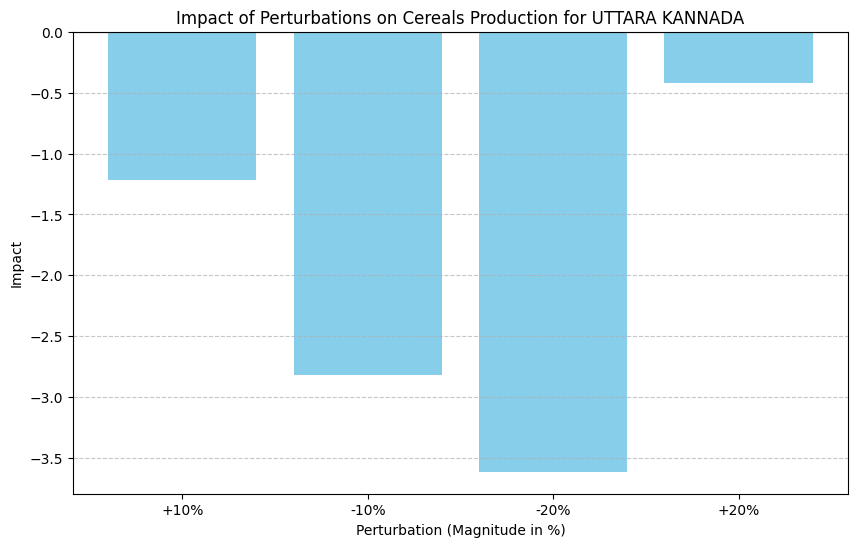

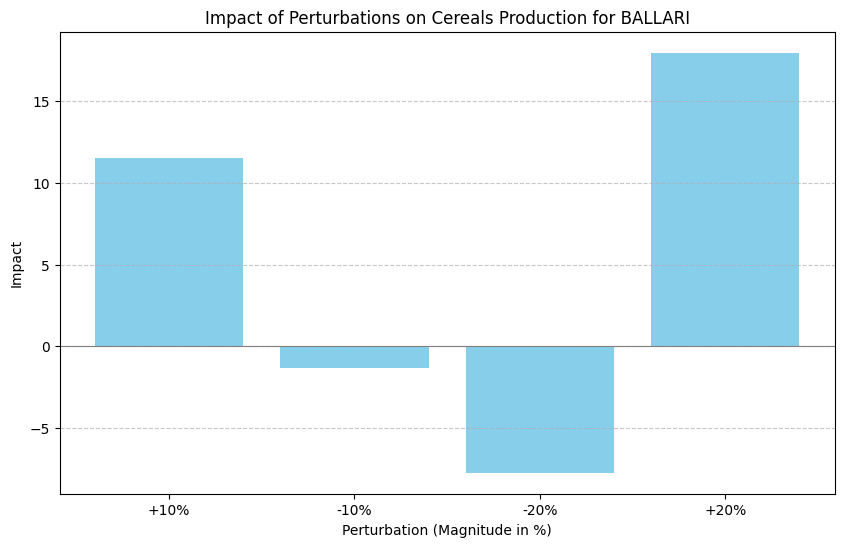

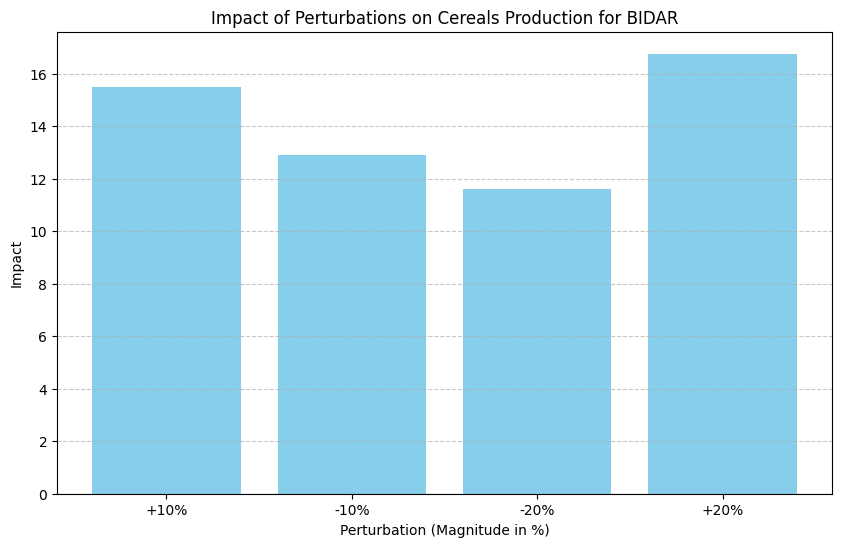

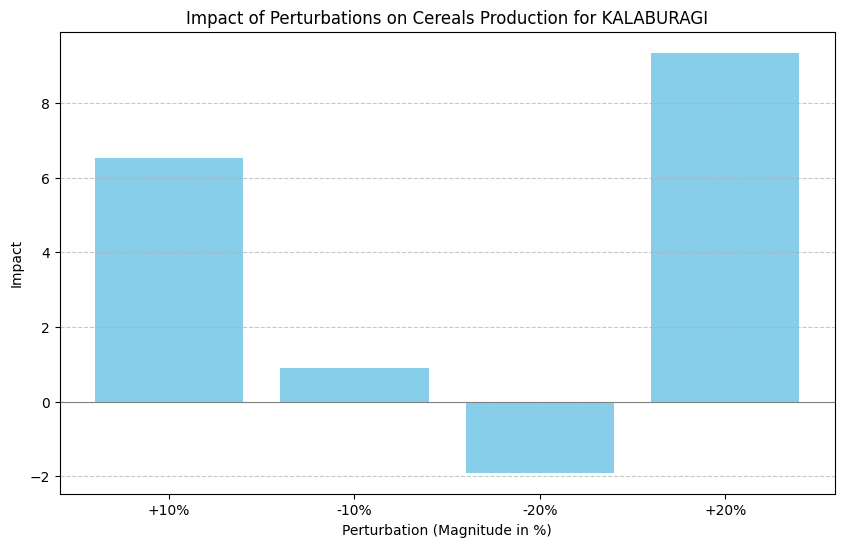

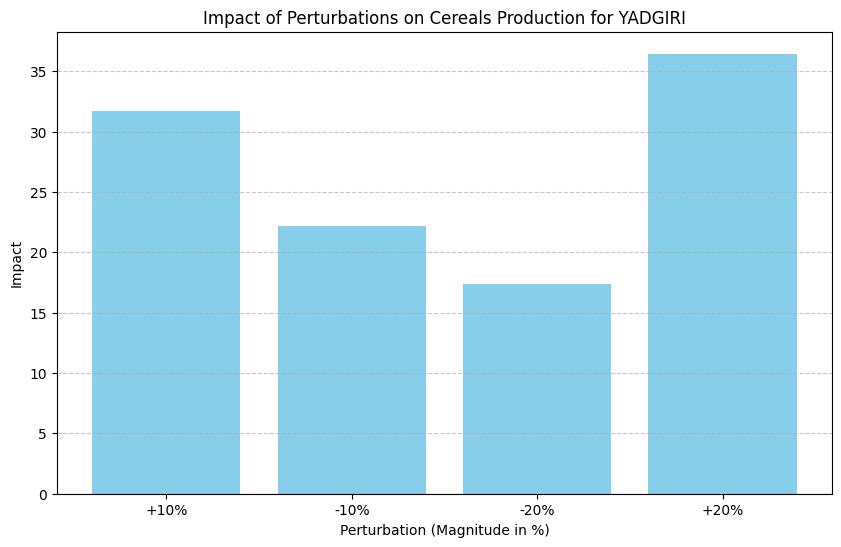

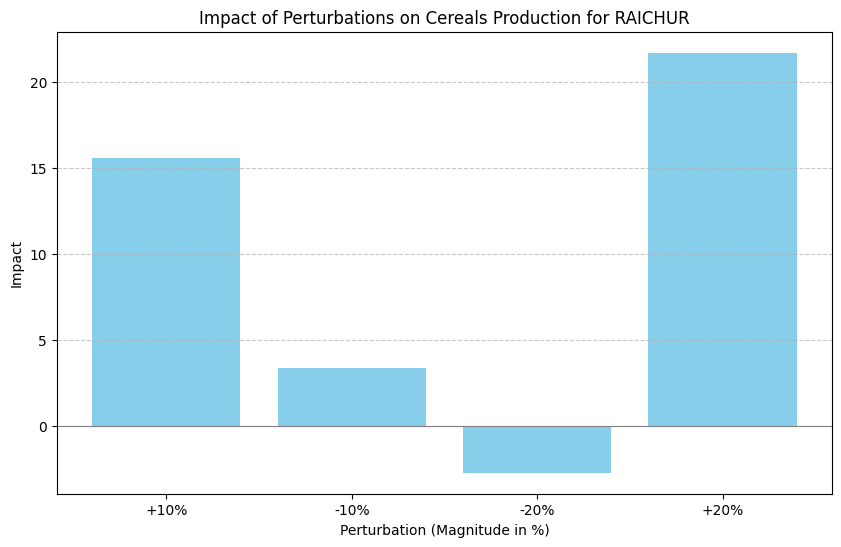

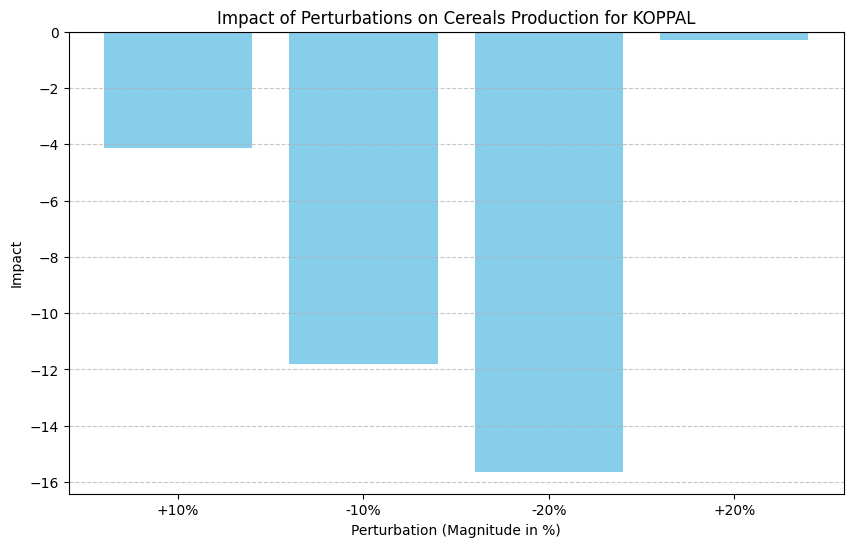

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['TotalCerealsandMinorMillets_Production']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [10, -10, -20, 20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'TotalCerealsandMinorMillets_Production'
cereals_production_min = y.min()
cereals_production_max = y.max()

# Loop through each unique district in the dataset
for district in data['District'].unique():
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    cereals_production_old = data.loc[data['District'] == district, 'TotalCerealsandMinorMillets_Production'].iloc[0]
    normalized_old = (cereals_production_old - cereals_production_min) / (cereals_production_max - cereals_production_min)

    impacts = []

    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        cereals_production_new = m * perturbed_totalnpk + c
        normalized_new = (cereals_production_new - cereals_production_min) / (cereals_production_max - cereals_production_min)
        impact = (normalized_new - normalized_old) * 100  # Impact calculation
        impacts.append(impact)

    # Plotting the impacts of each perturbation
    plt.figure(figsize=(10, 6))
    plt.bar([f'{p*100:+.0f}%' for p in perturbations_corrected], impacts, color='skyblue')
    plt.xlabel('Perturbation (Magnitude in %)')
    plt.ylabel('Impact')
    plt.title(f'Impact of Perturbations on Cereals Production for {district}')
    plt.axhline(0, color='gray', linewidth=0.8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# Performing linear regression on the entire dataset
X = data[['TotalNPK']]
y = data['TotalCerealsandMinorMillets_Production']
model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept

# User provided perturbations in percentages
user_perturbations = [10, -10, -20, 20]
# Converting percentages to fractions for calculation
perturbations_corrected = [p / 100.0 for p in user_perturbations]

# Min-max normalization parameters for 'TotalCerealsandMinorMillets_Production'
cereals_production_min = y.min()
cereals_production_max = y.max()

# Initialize an empty list to store results for each district
district_results = []

# Loop through each unique district in the dataset
for district in data['District'].unique():
    district_totalnpk = data.loc[data['District'] == district, 'TotalNPK'].iloc[0]
    cereals_production_old = data.loc[data['District'] == district, 'TotalCerealsandMinorMillets_Production'].iloc[0]
    normalized_old = (cereals_production_old - cereals_production_min) / (cereals_production_max - cereals_production_min)

    positive_impacts = []
    negative_impacts = []

    for p in perturbations_corrected:
        perturbed_totalnpk = district_totalnpk * (1 + p)
        cereals_production_new = m * perturbed_totalnpk + c
        normalized_new = (cereals_production_new - cereals_production_min) / (cereals_production_max - cereals_production_min)
        impact = (normalized_new - normalized_old) * 100  # Impact calculation

        if impact > 0:
            positive_impacts.append((impact, p))
        elif impact < 0:
            negative_impacts.append((impact, p))

    # Choose perturbation based on conditions
    if positive_impacts and not negative_impacts:
        chosen_perturbation = max(positive_impacts)[1]
    elif not positive_impacts and negative_impacts:
        chosen_perturbation = min(negative_impacts)[1]
    elif positive_impacts and negative_impacts:
        chosen_perturbation = max(positive_impacts)[1]

    district_results.append({
        'District': district,
        'Perturbation_Choosen': f'P{user_perturbations.index(chosen_perturbation*100)+1}'
    })

# Convert the results into a DataFrame and display
results_df = pd.DataFrame(district_results)
print(results_df)

            District Perturbation_Choosen
0          BENGALURU                   P4
1       BENGALURU(R)                   P4
2         RAMANAGARA                   P3
3        CHITRADURGA                   P3
4         DAVANAGERE                   P3
5              KOLAR                   P4
6    CHIKKABALLAPURA                   P4
7         SHIVAMOGGA                   P3
8           TUMAKURU                   P3
9     CHIKKAMAGALURU                   P4
10  DAKSHINA KANNADA                   P4
11             UDUPI                   P3
12            HASSAN                   P3
13            KODAGU                   P4
14            MANDYA                   P4
15            MYSURU                   P3
16    CHAMARAJANAGAR                   P4
17          BELAGAVI                   P4
18        VIJAYAPURA                   P3
19          BAGALKOT                   P4
20          DHARAWAD                   P4
21             GADAG                   P3
22            HAVERI              